In [4]:
import depthcharge.components as comp
import torch, torch.nn as nn, math
from matplotlib import pyplot as plt

In [2]:
enc = comp.SpectrumEncoder(n_head=1, dim_model=64, dim_intensity=32, n_layers=1)

In [11]:
# batch_size = 1, sequence length = 50 peaks, each peak is [m/z=i, intensity=i]
tens = torch.tensor([[[i/50*5000*2, i/50*2*torch.pi] for i in range(51)]])
tens2 = [[[289.286377,8068.000000],[295.545288,22507.000000],[298.489624,3925.000000],[317.324951,18742.000000],[319.655945,8604.000000],[324.482422,8041.000000],[325.316284,9738.000000],[339.789429,16145.000000],[343.947021,18094.000000],[347.020508,13981.000000],[347.913391,6765.000000],[361.147705,11763.000000],[361.844360,24296.000000],[364.232727,2346.000000],[364.858154,10782.000000],[365.845886,10242.000000],[368.221680,12761.000000],[368.965698,19147.000000],[375.069519,15644.000000],[375.751953,25393.000000],[382.750549,12765.000000],[384.197083,17912.000000],[390.574219,7993.000000],[394.049194,16135.000000],[397.106262,13986.000000],[404.420715,12326.000000],[411.092712,2348.000000],[413.784546,8715.000000],[427.667358,68137.000000],[436.192749,14879.000000],[443.266113,44427.000000],[446.267273,23472.000000],[447.747498,29292.000000],[455.250000,70939.000000],[456.107544,105392.000000],[456.822144,3.000000],[457.543213,12862.000000],[464.285461,8617.000000],[469.872314,87594.000000],[471.062195,31482.000000],[475.257324,15449.000000],[476.143616,23143.000000],[476.975159,28430.000000],[478.891113,27890.000000],[479.975952,33235.000000],[483.242432,13564.000000],[487.210388,32885.000000],[488.160156,20786.000000],[491.191956,55073.000000],[494.279602,7435.000000],[495.653992,32208.000000],[498.412964,11684.000000],[503.028198,30643.000000],[503.699951,2.000000],[504.344543,36421.000000],[505.154541,9667.000000],[510.176514,38891.000000],[512.168701,10175.000000],[513.265381,16524.000000],[514.957397,11384.000000],[515.922852,78764.000000],[520.973389,28857.000000],[521.823730,5810.000000],[523.168945,58926.000000],[529.036865,20722.000000],[530.991211,31845.000000],[532.376709,3005.000000],[534.575195,12906.000000],[538.003174,220949.000000],[539.217773,272296.000000],[540.672852,43876.000000],[548.061401,13655.000000],[554.117432,76225.000000],[556.030396,214421.000000],[557.288818,52970.000000],[557.996094,6202.000000],[559.942261,18112.000000],[561.328735,14656.000000],[564.123047,25971.000000],[564.948730,34630.000000],[566.439941,35564.000000],[571.333740,61305.000000],[572.047363,17235.000000],[575.219238,42127.000000],[575.888916,6.000000],[577.102905,29550.000000],[579.645874,7151.000000],[580.942627,17609.000000],[582.110107,102075.000000],[583.458984,10113.000000],[585.237061,36774.000000],[598.172485,26085.000000],[599.352783,764523.000000],[600.382812,114267.000000],[601.066650,4.000000],[602.267578,27144.000000],[609.302002,10247.000000],[613.415771,8621.000000],[622.208984,23787.000000],[623.023193,63940.000000],[623.991455,19154.000000],[625.216187,23050.000000],[638.299561,12481.000000],[640.265625,17392.000000],[641.235107,65873.000000],[646.095947,8409.000000],[649.277100,5446.000000],[651.526611,17521.000000],[657.128906,12911.000000],[658.094971,14824.000000],[659.420898,41969.000000],[663.387695,18284.000000],[668.332520,65700.000000],[669.357178,5671.000000],[680.219727,44374.000000],[681.987793,24446.000000],[685.957764,19166.000000],[691.648682,29177.000000],[693.225830,33545.000000],[694.307861,22539.000000],[696.332397,121211.000000],[697.127808,9503.000000],[709.464478,20171.000000],[710.795410,22346.000000],[711.744873,32675.000000],[714.071777,50487.000000],[715.578979,54567.000000],[716.216553,8.000000],[723.267822,14415.000000],[724.081909,88510.000000],[725.488892,8470.000000],[728.352051,21518.000000],[735.806396,52022.000000],[738.346680,2697.000000],[744.365234,16205.000000],[747.456055,19268.000000],[753.271240,14114.000000],[761.609131,12373.000000],[764.462158,19876.000000],[765.280029,18361.000000],[769.275635,41999.000000],[770.328613,16548.000000],[771.386353,13776.000000],[787.432617,33003.000000],[796.139526,9637.000000],[797.232788,11322.000000],[806.556885,18639.000000],[808.442383,6355.000000],[811.637329,14687.000000],[812.300049,9904.000000],[813.149292,15959.000000],[817.219238,7640.000000],[820.274048,6246.000000],[821.288208,15591.000000],[823.361328,13693.000000],[824.618286,6895.000000],[828.517456,32132.000000],[830.409302,102583.000000],[831.306763,65294.000000],[832.105469,9727.000000],[833.184570,4115.000000],[835.212891,7606.000000],[836.078247,8740.000000],[838.518677,26160.000000],[839.455811,72006.000000],[845.612915,21577.000000],[847.433594,196462.000000],[848.125854,39637.000000],[851.380859,246170.000000],[852.370605,276882.000000],[853.270508,44216.000000],[865.597900,44697.000000],[866.295654,111012.000000],[867.190430,4120.000000],[868.372192,78023.000000],[869.331177,8584.000000],[871.557007,5374.000000],[877.137451,30131.000000],[880.216553,5692.000000],[883.442261,49241.000000],[884.216553,8.000000],[888.167114,41037.000000],[889.282959,24795.000000],[892.127808,14925.000000],[893.467896,23506.000000],[895.607422,13123.000000],[899.010132,28633.000000],[901.351196,13472.000000],[902.325562,3774.000000],[909.424438,244136.000000],[910.515381,43770.000000],[911.526367,15208.000000],[914.308960,6532.000000],[915.217773,28455.000000],[918.666138,5610.000000],[919.396240,85829.000000],[920.066650,3.000000],[921.123901,16163.000000],[922.205688,37863.000000],[925.063721,43395.000000],[931.132812,61732.000000],[932.351929,136657.000000],[933.524048,25202.000000],[935.493286,33896.000000],[936.552002,103130.000000],[937.588623,67605.000000],[938.471069,35379.000000],[939.617920,77289.000000],[946.257812,38584.000000],[949.370239,85420.000000],[950.284546,5976.000000],[951.551758,29995.000000],[953.396606,545281.000000],[954.491577,123937.000000],[963.686768,261578.000000],[964.524658,318164.000000],[965.192139,124405.000000],[982.221924,27147.000000]]]
tens2 = torch.tensor(tens2)
peaks = enc.peak_encoder(tens)
two_pi = torch.pi * 2
inten = [round(v.item(), 4) for v in two_pi * enc.peak_encoder.int_encoder.sin_term]
mz = [round(v.item(), 4) for v in two_pi * enc.peak_encoder.sin_term]

print("intensity: ", inten)
print("m/z", mz)

intensity:  [6.2832, 5.5586, 4.9176, 4.3505, 3.8489, 3.405, 3.0124, 2.665, 2.3577, 2.0858, 1.8453, 1.6325, 1.4442, 1.2777, 1.1303, 1.0]
m/z [0.001, 0.0029, 0.0086, 0.0251, 0.0736, 0.2154, 0.631, 1.8478, 5.4117, 15.8489, 46.4159, 135.9357, 398.1072, 1165.9146, 3414.5488, 10000.0]


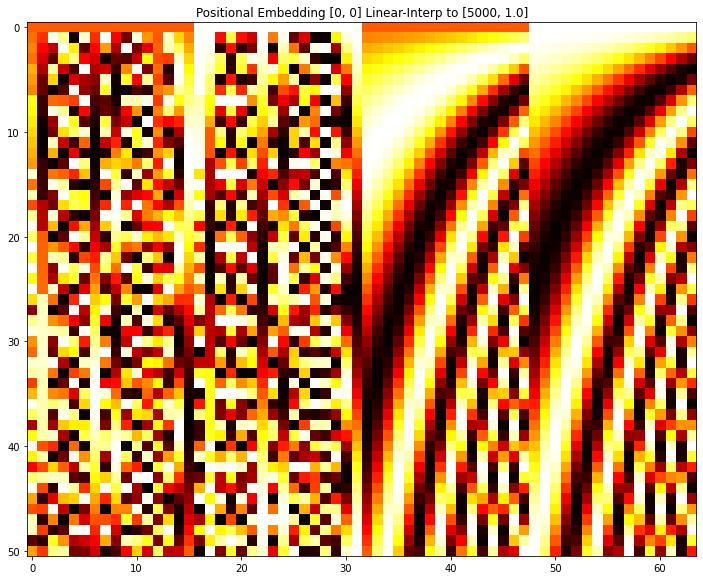

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_title("Positional Embedding [0, 0] Linear-Interp to [5000, 1.0]")
ax.imshow(peaks[0], cmap='hot')
fig.show()

In [13]:
class Tnsfmer(nn.Module):
    def __init__(self, dim_model=128, dim_intensity = 32, n_head=4, n_layers=4, dim_ff = 512):
        super().__init__()
        self.enc = comp.SpectrumEncoder(n_head=n_head, dim_model=dim_model, dim_intensity=dim_intensity, n_layers=n_layers)
        
        dec_layer = nn.TransformerDecoderLayer(
            d_model=dim_model,
            nhead=n_head,
            dim_feedforward=dim_ff,
            batch_first=True,
            dropout=0.25,
        )
        
        self.dec = nn.TransformerDecoder(
            dec_layer,
            num_layers=n_layers,
        )
        
        self.classify_token = nn.Embedding(1, dim_model)
        
    def forward(self, x):
        o1, _ = self.enc(x)
        print("o1: ", o1.size())
        tokens = self.classify_token(torch.zeros(x.size()[0], dtype=torch.long)).unsqueeze(1)
        print("tokens: ", tokens.size())
        o2 = self.dec(memory=o1, tgt = tokens)
        return o2

In [14]:
model = Tnsfmer(dim_model=32, dim_intensity=16, n_head=1, n_layers=1, dim_ff=128)
model.eval()
input_seq = torch.rand((22, 50, 2))

In [15]:
with torch.no_grad():
    out = model(input_seq)
    print(out.size())

o1:  torch.Size([22, 51, 32])
tokens:  torch.Size([22, 1, 32])
torch.Size([22, 1, 32])
